<a href="https://colab.research.google.com/github/leticiaqs/puc-analise-de-dados/blob/main/MVP_Sprint_Analise_de_Dados_e_Boas_Praticas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP - Análise de Dados e Boas Práticas

Ciencia de Dados & Analytics

Aluna: Leticia Quintanilha

##O Problema


Embora seus efeitos sejam sentidos de formas distintas em cada parte do planeta, já se tornou um consenso que as mudanças climáticas se tratam de um problema global. Nesse sentido, países considerados desenvolvidos têm apoiado  sistematicamente projetos  para endereçar a questão através de recursos financeiros, especialmente após a assinatura do acordo de Paris em 2015. Alega-se que mais de 100 bilhões já foram investidos, mas muito se questiona a respeito da destinação e de como tem sido o processo de transferência desse investimento.

Considerando essa problemática e, por meio de um dataset com dados sobre projetos de financiamento climático, esse trabalho pretende trazer observações que ajudem a compreender melhor os investimentos realizados neste campo.

Dessa forma, a observação desse dataset envolve algumas hipóteses, entre elas a de os montantes investidos variam muito entre os países financiadores e a de que os recursos podem estar muito direcionados a uma região ou tipo de projeto específico.

Nesse caso, não se trata de um problema voltado para o aprendizado de máquina, de forma que a maior parte das questões podem ser respondidas com análises e estatísticas básicas sobre os atributos do dataset cruzamentos simples. Porém, para aprofundar as análises, poderia ser empregado um modelo não supervisionado de clusterização, a fim de identificar possíveis perfis, como dos países financiadores ou dos tipos de projetos de financiamento.

### O Dataset

O dataset escolhido é o resultado de um levantamento realizado pela Big Local News em parceria com a Reuters, publicado no repositório da Universidade de Standford. Cada linha da tabela traz um projeto de financiamento e seus respectivos atributos, como valor, país financiador, tipo de projeto, status, etc. Os dados foram obtidos por meio dos relatórios oficiais entregues pelos países as Nações Unidas no contexto do Programa *United Nations Framework Convention on Climate Change* (UNFCCC).

Os dados disponibilizados já contam com um pré-processamento simplificado realizado pelo próprio grupo de pesquisa, para tornar mais claras infomações como, por exemplo, o valor do projeto, cujo dado original poderia ser expresso em diferentes moedas. Por outro lado, esse processamento fez com que em alguns casos, uma mesma característica seja expressa em duas colunas diferentes.

O dataset original foi obtido neste site, que contém também outras documentações sobre os dados e a pesquisa: https://purl.stanford.edu/dx902xg3463

#### Principais caracterísiticas

A maior parte dos atributos do dataset são de natureza qualitativa, com características que descrevem o projeto de financiamento. No entanto, um atributo bastante relevante é o que traz a variável numérica do valor do financiamento em dólares.
Destaca-se também que, alguns atributos podem ser considerados como subconjunto de outros. É o caso dos atributos país e continente, sendo então variáveis relacionadas.

#### Dicionário de dados (atributos do dataset)

- ***id**: identificador único de cada financiamento
- ***year**: ano identificado no relatório
- ***reporting_party**: nome do responsável pelo relatório
- **recipient_country_region_project_programme**: informação sobre o recebedor do financiamento (incluindo programa e projeto)
- ***recipient**: país(es) ao qual o financiamento é destinado
- ***recipient_continent_or_region**: região ou continente recebedor (quando não há informação sobre o país)
- ***assigned_geography**: região ou continente conforme nomenclatura oficial ONU
- **usd**: valor do financiamento em dólar
- **euro**: valor do financiamento em euro
- ***usd_corrected**: valor do financiamento convertido/corrigido em dólar
- **status**: status do financiamento indicado no relatório
- **funding_source**: fonte do financiamento reportada
- **type_of_support**: natureza do apoio concedido com o financiamento
- **financial_instrument**: tipo de instrumento de financiamento utilizado
- **sector**: setor/atividade econômica para o qual é destinado o financiamento
- **additional_information**: observações e informações adicionais sobre o projeto
- ***africa**: se a destinação do financiamento está relacionada à Africa (true or false)
- ***latin_america_and_caribbean**: se a destinação do financiamento está relacionada à América Latina e Caribe (true or false)
- ***north_america**: se a destinação do financiamento está relacionada à América do Norte (true or false)
- ***asia**: se a destinação do financiamento está relacionada à Asia (true or false)
- ***europe**: se a destinação do financiamento está relacionada à Europa (true or false)
- ***oceania**: se a destinação do financiamento está relacionada à Oceania (true or false)
- ***middle_east**: se a destinação do financiamento está relacionada ao Oriente Médio (true or false)
- ***mediterranean**: se a destinação do financiamento está relacionada à região do Mediterrêneo (true or false)
- ***global**:se a destinação do financiamento é de caráter global (true or false)
- ***multicontinent_or_global**: se a destinação do financiamento está relacionada a mais de um continente ou é feita em caráter global (true or false)
- ***continent_unspecified**: se não há informação sobre o continente de destinação do financiamento (true or false)
- **croatian_kuna**: valor do financiamento em HRK
- **norwegian_krone**: valor do financiamento em NOK
- **japanese_yen**: valor do financiamento em JPY
- **danish_krone**: valor do financiamento em DKK
- **british_pound**: valor do financiamento em GBP
- **american_dollar**: valor do financiamento em USD
- **swiss_franc**: valor do financiamento em CHF
- **australian_dollar**: valor do financiamento em AUD
- **romanian_leu**: valor do financiamento em RON
- **swedish_krona**: valor do financiamento em SEK
- **canadian_dollar**: valor do financiamento em CAD
- **new_zealand_dollar**: valor do financiamento em NZD
- **czech_koruna**: valor do financiamento em CZK
- **bulgarian_lev**: valor do financiamento em BGN
- **icelandic_krona**: valor do financiamento em ISK
- **polish_zloty**: valor do financiamento em PLN
- **hungarian_forint**: valor do financiamento em HUF


Obs.: as colunas sinalizadas com (*) foram criadas pela equipe que realizou o estudo após algum tipo de processamento.

## Import de bibliotecas

In [ ]:
# tratamento e processamento dos dados

import pandas as pd
import numpy as np
import missingno as ms # para tratamento de missings

In [ ]:
# visualização e gráficos

import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
# bibliotecas para load do dataset a partir do drive

!pip install gdown
import gdown
import os

In [ ]:
# configuração para não exibir warnings

import warnings
warnings.filterwarnings('ignore')

## Importação e leitura dos dados

Devido ao tamanho do dataset, foi feita a opção de armazená-lo em uma pasta do drive, com compartilhamento aberto via link e, então, realizar o download para uma pasta local do notebook.

Dessa forma, evita-se problemas relacionados às limitações do espaço de armazenamento oferecido pelo github, e é ainda mantido o acesso público do dataset para aqueles que utilizarem esse notebook.

In [ ]:
# Import do dataset

# código do link de compartilhamento
file_id = '1pdcFfstrDJS3JZ659osYgayMdVWPDrAP'
url = f'https://drive.google.com/uc?id={file_id}'

# criação de uma pasta local (notebook) para armazenamento
folder_path = './dataset'
os.makedirs(folder_path, exist_ok=True)

# download para a pasta local
output = 'dataset/climatefinance_raw.csv'
gdown.download(url, output)

Downloading...
From: https://drive.google.com/uc?id=1pdcFfstrDJS3JZ659osYgayMdVWPDrAP
To: /content/dataset/climatefinance_raw.csv
100%|██████████| 15.2M/15.2M [00:00<00:00, 102MB/s] 


'dataset/climatefinance_raw.csv'

In [ ]:
# leitura do csv

dataset = pd.read_csv('/content/dataset/climatefinance_raw.csv')

dataset.head() # 5 primeiras linhas do dataset

,id,year,reporting_party,recipient_country_region_project_programme,recipient,recipient_continent_or_region,assigned_geography,usd,euro,corrected_usd,...,australian_dollar,romanian_leu,swedish_krona,canadian_dollar,new_zealand_dollar,czech_koruna,bulgarian_lev,icelandic_krona,polish_zloty,hungarian_forint
0,0,2018,spain,"América Latina, no especificado / ONO Medio Am...",NaN,latin america and the caribbean,latin america and the caribbean,236128.0000,200000.0000,236128.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2018,spain,Global / PNUD - NDC Support Programme,NaN,global,multicontinent_or_global,826446.0000,700000.0000,826446.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2018,spain,Global / CMNUCC (UNFCCC) Trust Fund for partic...,NaN,global,multicontinent_or_global,283353.0000,240000.0000,283353.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2018,spain,"América Latina, no especificado / CEPAL (ECLAC...",NaN,latin america and the caribbean,latin america and the caribbean,236128.0000,200000.0000,236128.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2018,spain,"Africa Subsahariana / ÁFRICA SUBSAHARIANA, NO ...",NaN,africa,africa,147580.0000,125000.0000,147580.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Nessa primeira leitura do dataset, já é possível identificar a quantidade de atributos (44 colunas). Ainda que seja uma pequena amostra dos dados, já é possível perceber também algumas de suas características, como a presença de nulos em algumas colunas e que algumas variáveis rebem textos longos.

## Utilidades (funções e configurações)

Para uma melhor organização do notebook, nessa seção serão trazidas as definições das funções utilizadas ao longo do notebook para diferentes formas de processamento dos dados.

Também são executadas nessa seção algumas definições de configuração, especialmente para a exibição dos gráficos utilizados nas as análises.

### Funções pré-processamento e limpeza

#### 1) Redução de atributos

In [ ]:
# remoção das colunas referentes a moedas locais

def remove_currencies(df: pd.DataFrame) -> pd.DataFrame:

  # seleção de colunas a permanescer no dataset:
  df_only_usd = df[[
      'id',
      'year',
      'reporting_party',
      'recipient_country_region_project_programme',
      'recipient',
      'recipient_continent_or_region',
      'assigned_geography',
      'corrected_usd',
      'status',
      'funding_source',
      'type_of_support',
      'financial_instrument',
      'sector',
      'additional_information',
      'africa',
      'latin_america_the_caribbean',
      'north_america',
      'middle_east',
      'mediterranean',
      'asia',
      'europe',
      'oceania',
      'global',
      'multicontinent_or_global',
      'continent_unspecified'
  ]].copy()

  return df_only_usd

In [ ]:
# remoção de redundancia sobre o local de destinação do financiamento

def remove_duplicateinfo(df: pd.DataFrame) -> pd.DataFrame:

  # seleção de colunas a permanescer no dataset:
  df_reduced = df[[
      'id',
      'year',
      'reporting_party',
      'corrected_usd',
      'status',
      'funding_source',
      'type_of_support',
      'financial_instrument',
      'sector',
      'recipient',
      'africa',
      'latin_america_the_caribbean',
      'north_america',
      'middle_east',
      'mediterranean',
      'asia',
      'europe',
      'oceania',
      'global',
      'multicontinent_or_global',
      'continent_unspecified'
  ]].copy()

  return df_reduced

####2) Ajuste datatype

In [ ]:
# transformação de boleanas em 0 e 1

def bool_to_int(df: pd.DataFrame) -> pd.DataFrame:

  # cópia do dataset
  df_transformed = df.copy()

  # lista de variáveis a modificar
  bool_var = [
        'africa',
        'latin_america_the_caribbean',
        'north_america',
        'middle_east',
        'mediterranean',
        'asia',
        'europe',
        'oceania',
        'global',
        'multicontinent_or_global',
        'continent_unspecified'
  ]

  # transformação das variáveis em 1 ou 0
  for column in bool_var:
    df_transformed[column] = df_transformed[column].astype(int)


  return df_transformed

####3) Limpeza

In [ ]:
# removendo entradas com valor de financiamento negativo

def remove_negatives(df: pd.DataFrame) -> pd.DataFrame:

  # copia do dataset
  df_cleaned = df.copy()

  # remove as entradas negativas e igual a 0
  df_cleaned = df_cleaned[df_cleaned['corrected_usd'] > 0]

  return df_cleaned

In [ ]:
# removendo espaços antes ou depois do texto

def remove_spaces(df: pd.DataFrame) -> pd.DataFrame:

  df_modified = df.copy()

  df_modified = df_modified.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)

  return df_modified

In [ ]:
# convertendo textos em somente minúsculas

def lower_case(df: pd.DataFrame) -> pd.DataFrame:

  df_modified = df.copy()

  df_modified = df_modified.apply(lambda x: x.str.lower() if x.dtype == 'object' else x)

  return df_modified

In [ ]:
# ajuste 'manual' de categorias duplicadas ('type_of_support')

def duplicate_adjust (df: pd.DataFrame) -> pd.DataFrame:

  df_adjusted = df.copy()

  # dicionário de substituições a fazer
  replacements = {
      'cross cutting': 'cross-cutting',
      'other (crosscutting)': 'cross-cutting',
      'other ()': 'other',
      'as individual concessional loan':'other (as individual concessional loan)',
      'post-secondary education': 'other (post-secondary education)'
  }

  # substituição das entradas conforme dicionário
  df_adjusted['type_of_support'] = df_adjusted['type_of_support'].replace(replacements)

  return df_adjusted

#### 4) Conversão de unidade (valor do financiamento)

In [ ]:
# transformando unidade de medida do valor do financiamento

def convert_to_thousands(df: pd.DataFrame) -> pd.DataFrame:

  # copia do dataset
  df_modified = df.copy()

  # converte o valor em mil dólares
  df_modified['corrected_usd'] = df_modified['corrected_usd'] / 1000

  return df_modified

#### 5) Criação de novo atributo

In [ ]:
# criação de novo atributo sobre o tipo de suporte

def create_support_att(df: pd.DataFrame) -> pd.DataFrame:

  df_new_att = df.copy()

  # dicionário com regra para a atribuição da nova coluna
  categories = {
      'adaptation' : 'adaptation',
      'mitigation': 'mitigation',
      'cross-cutting' : 'cross-cutting',
      'other': 'other',
      'redd+/biodiversity (cross-cutting)' : 'cross-cutting',
      'redd+/biodiversity (adaptation)' : 'adaptation',
      'redd+/biodiversity (mitigation)' : 'mitigation',
      'other (as individual concessional loan)' : 'other',
      'other (capacity building)' : 'other',
      'other (reseach)' : 'other',
      'other (post-secondary education)' : 'other'
  }

  # atribui valores na nova coluna conforme dicionário
  df_new_att['type_of_support_group'] = df_new_att['type_of_support'].apply(lambda subcat: categories.get(subcat, 'other'))

  return df_new_att

###Configurações

#### 1) exibição de casas decimais

In [ ]:
# ajusta a notação para 4 casas decimais (sem notação científica)

pd.set_option('display.float_format', lambda x: '%.4f' % x)

####2)exibição dos gráficos

In [ ]:
# inclui folha de estilo
plt.style.use('seaborn-v0_8')

# determina escala dos textos nos gráficos
sn.set(font_scale = 0.85)


## Primeiras explorações

Serão exploradas a seguir algumas características gerais do dataset, para que, de posse dessas informações, seja possível definir as melhores opções de pré-processamento e caminhos para obter as respostas ao problema colocado.

In [ ]:
# tamanho do dataset

print(dataset.shape)

(43844, 44)


Por meio dessa leitura, é sabido que o dataset possui 43.844 instâncias (neste caso, projetos de financiamento) e 44 atributos (colunas).

### Tipo dos atributos

In [ ]:
# informações básicas dos atributos

print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43844 entries, 0 to 43843
Data columns (total 44 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   id                                          43844 non-null  int64  
 1   year                                        43844 non-null  int64  
 2   reporting_party                             43844 non-null  object 
 3   recipient_country_region_project_programme  43844 non-null  object 
 4   recipient                                   33741 non-null  object 
 5   recipient_continent_or_region               9579 non-null   object 
 6   assigned_geography                          43844 non-null  object 
 7   usd                                         41767 non-null  float64
 8   euro                                        21970 non-null  float64
 9   corrected_usd                               43843 non-null  float64
 10  status    

Com essas informações, observa-se que o dataset possui 11 colunas do tipo 'bool' (verdadeiro ou falso), 6 do tipo 'float64' (valores numéricos com casas decimais), 2 do tipo 'int64' (valores numéricos inteiros) e 25 do tipo 'object'. Esse último, indica que o atributo é provavelmente de natureza categórica, em geral, com entradas do tipo *string*, sendo maioria nesse dataset.

É também possível observar que há 'missings' em diversos atributos, chegando a ter nulos em todas as instâncias em alguns casos. Isso ocorre principalmente nas colunas que indicam sobre o valor do financiamento em moedas específicas, o que se relaciona a maneira como o dataset foi elaborado. Os autores optaram por manter os valores originalmente declarados de cada projeto (que poderia ser expresso na moeda local do país financiador), gerando assim diversas colunas associadas ao valor do financiamento. No entanto, para facilitar possíveis comparações e padronizar em uma só moeda, a coluna 'corrected_usd' traz todos os valores convertidos para o dolar.

Dessa forma, para uma melhor manipulação dos dados, a fim de avançar no problema proposto e resposta das questões colocadas, faz-se necessário realizar algumas etapas de pré-processamento no dataset para a sua simplificação e retirada de informações que não serão relevantes para a análise.

## Pré-processamento

#### 1) redução de atributos

Como visto na etapa anterior, algumas colunas não trazem dados relevantes para a questão colocada, sendo ainda redundantes quanto à informação apresentada, além de contar com diversas entradas nulas/missings. Com isso, no intuito de também facilitar a posterior leitura do dataset (incluindo um possível uso em problemas de aprendizado de máquina), algumas dessas colunas serão removidas do dataset.

In [ ]:
# remove colunas referentes a moedas diferentes do dólar

dataset = remove_currencies(dataset)

Com esta operação, o dataset foi reduzido passando a apresentar somente uma coluna referente ao valor do projeto de financiamento, com todos os valores em sua conversão para o dolar. Com isso, foram removidas as colunas que traziam valores em outras moedas, eliminando ainda boa parte dos missings do dataset.

In [ ]:
# atributos do novo dataset

print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43844 entries, 0 to 43843
Data columns (total 25 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   id                                          43844 non-null  int64  
 1   year                                        43844 non-null  int64  
 2   reporting_party                             43844 non-null  object 
 3   recipient_country_region_project_programme  43844 non-null  object 
 4   recipient                                   33741 non-null  object 
 5   recipient_continent_or_region               9579 non-null   object 
 6   assigned_geography                          43844 non-null  object 
 7   corrected_usd                               43843 non-null  float64
 8   status                                      43840 non-null  object 
 9   funding_source                              43813 non-null  object 
 10  type_of_su

Apesar da redução para 25 colunas, ainda há diversos atributos cujo tipo ainda não é adequado para a realização das análises desejadas. Ao realizar mais uma vez uma leitura cuidadosa da documentação do dataset para a compreensão dos dados contidos em cada atributo, foram identificadas novas redundâncias, optando-se pela remoção de mais colunas.

Esse foi o caso dos atributos que indicam sobre a destinação dos investimentos. Há uma coluna que acumula mais de uma informação (país, região e programa) ao mesmo tempo que esse dado está também expresso em colunas específicas. No caso dos continentes de destino, manteremos apenas as colunas do tipo boleana, que facilitarão o processamento e análises posteriormente. A coluna *'additional_information'* também possui seus dados mais relevantes representados em outros atributos e, por isso, optou-se também pela sua remoção, a fim de evitar redundâncias.

In [ ]:
# remove colunas com informações redundantes

dataset = remove_duplicateinfo(dataset)

In [ ]:
# atributos do novo dataset

print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43844 entries, 0 to 43843
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           43844 non-null  int64  
 1   year                         43844 non-null  int64  
 2   reporting_party              43844 non-null  object 
 3   corrected_usd                43843 non-null  float64
 4   status                       43840 non-null  object 
 5   funding_source               43813 non-null  object 
 6   type_of_support              43836 non-null  object 
 7   financial_instrument         43836 non-null  object 
 8   sector                       43808 non-null  object 
 9   recipient                    33741 non-null  object 
 10  africa                       43844 non-null  bool   
 11  latin_america_the_caribbean  43844 non-null  bool   
 12  north_america                43844 non-null  bool   
 13  middle_east     

Após essa modificação restaram apenas as 20 colunas que contêm informações que serão propriamente relevantes para as análises pretendidas. Além disso, tratam-se de atributos com poucos dados nulos (missings), o que também contribui para a qualidade das observações.

#### 2) transformação de boleanas

Considerando os tipos de dados ainda presentes no dataset, para facilitar o processamento das análises envolvendo as informações contidas nas colunas
do tipo boleana, faremos a sua transformação para valores numéricos de 1 e 0.

Trata-se de uma operação semelhante a de 'one-hot-enconding', porém mais simples, já que nesse caso as informações já estão organizadas no formato verdadeiro ou falso.

In [ ]:
# transforma boleana em 1 ou 0

dataset = bool_to_int(dataset)

In [ ]:
# exibe 5 primeiras linhas do dataset

dataset.head()

,id,year,reporting_party,corrected_usd,status,funding_source,type_of_support,financial_instrument,sector,recipient,...,latin_america_the_caribbean,north_america,middle_east,mediterranean,asia,europe,oceania,global,multicontinent_or_global,continent_unspecified
0,0,2018,spain,236128.0000,Committed,ODA,cross-cutting,Grant,Cross-cutting,NaN,...,1,0,0,0,0,0,0,0,0,0
1,1,2018,spain,826446.0000,Committed,ODA,cross-cutting,Grant,Cross-cutting,NaN,...,0,0,0,0,0,0,0,1,1,0
2,2,2018,spain,283353.0000,Committed,ODA,cross-cutting,Grant,Cross-cutting,NaN,...,0,0,0,0,0,0,0,1,1,0
3,3,2018,spain,236128.0000,Committed,ODA,cross-cutting,Grant,Cross-cutting,NaN,...,1,0,0,0,0,0,0,0,0,0
4,4,2018,spain,147580.0000,Committed,ODA,adaptation,Grant,Agriculture,NaN,...,0,0,0,0,0,0,0,0,0,0


Por meio da visualização das primeiras linhas do novo dataset, é possível confirmar que a transformação desejada foi efetivada nas colunas do tipo boleana.

### 3) missings

Na etapa em que foi realizada a redução de atributos, foram também eliminadas as colunas com maior ocorrência de valores nulos ou vazios no dataset. Nesse momento, portanto, será avaliado se ainda há necessidade de proceder algum novo tratamento para lidar com dados desse tipo.

<Axes: >

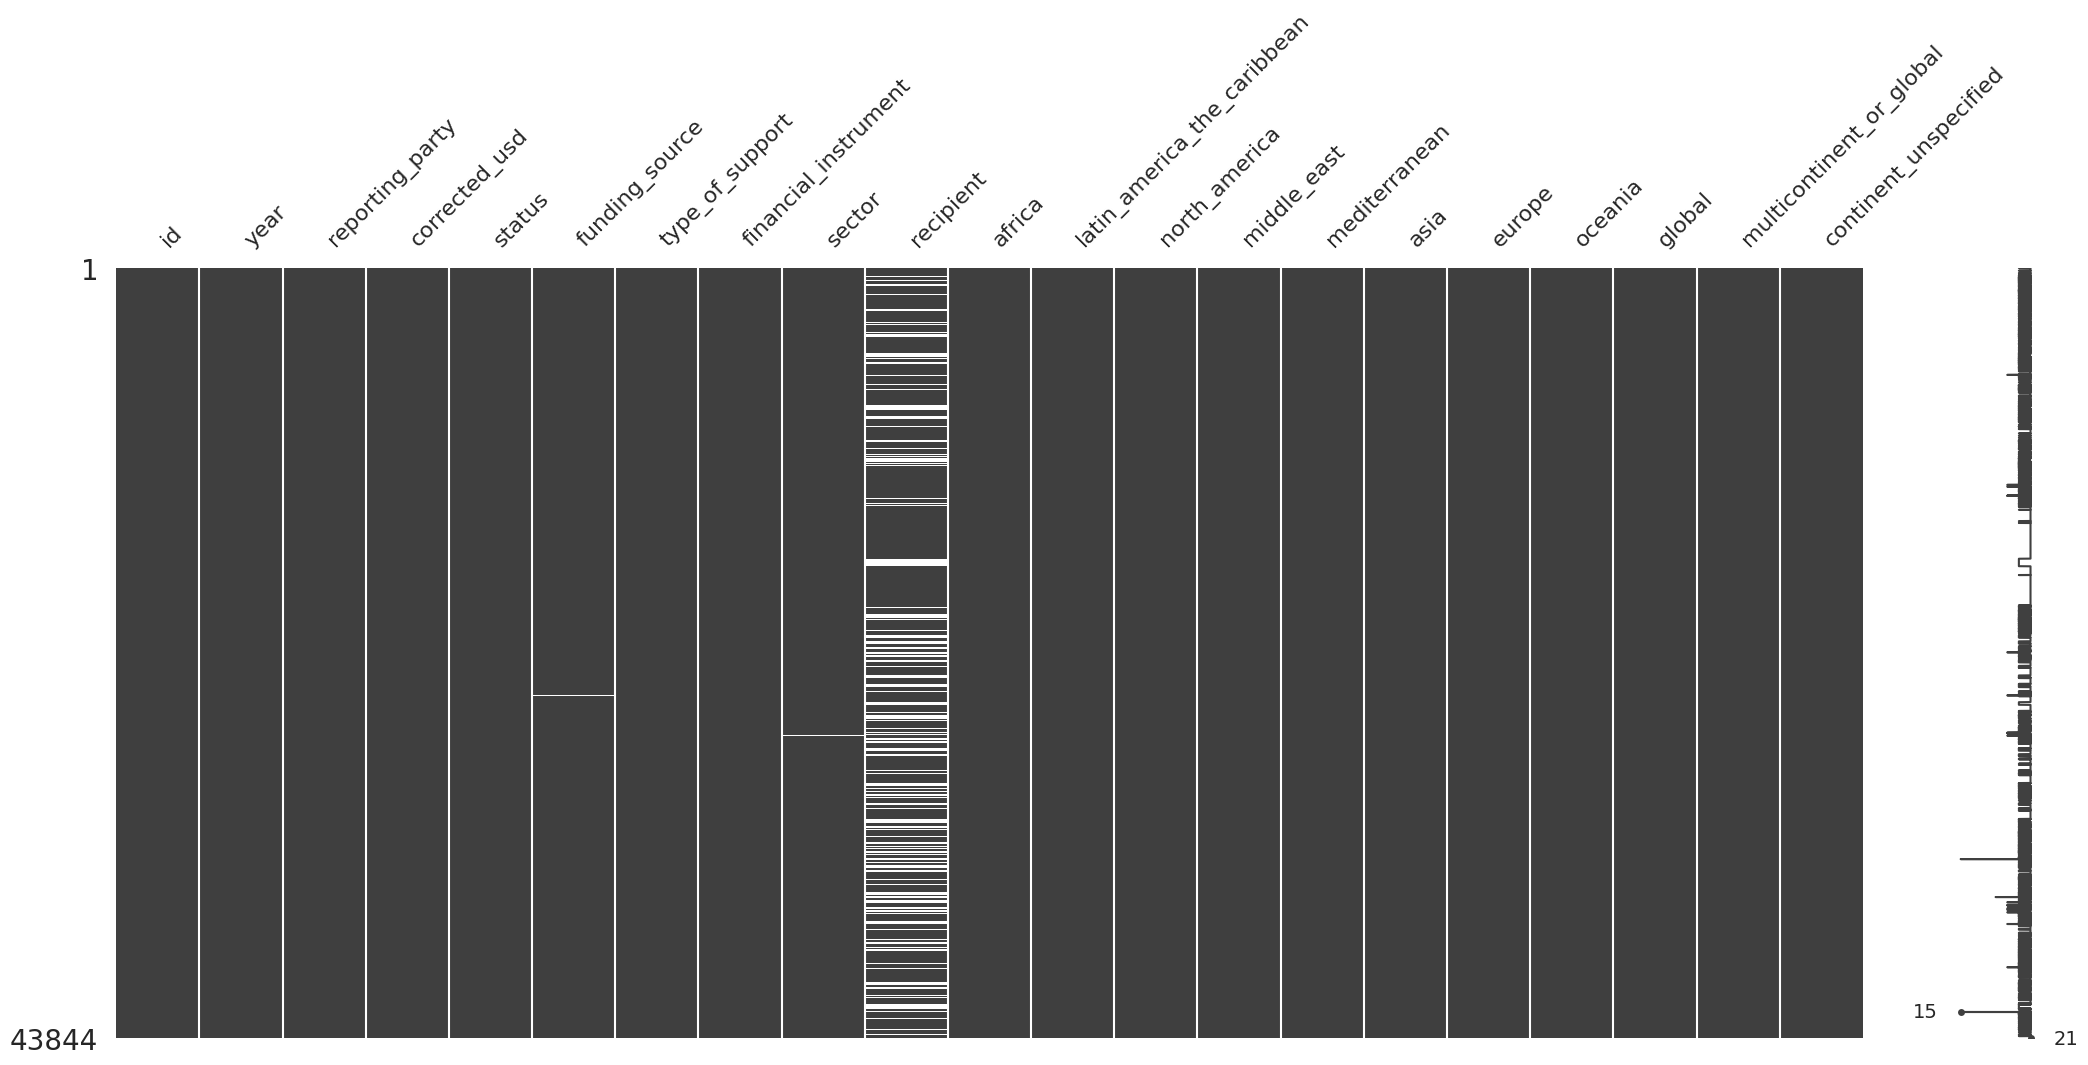

In [ ]:
# cria matriz de missings

ms.matrix(dataset)

Na maior parte das colunas ainda presentes no dataset, observa-se que praticamente não há dados faltantes. Destaca-se somente a coluna 'recipient', que indica sobre o país recebedor do financiamento climático. Por haver também outras colunas que tratam do local de destino dos projetos financiados (colunas boleanas que indicam o continente ou região), a ausência de informação em algumas das instâncias na coluna 'recipient' não prejudicará as análises propostas.

Além disso, as variáveis com missings são categóricas, de forma que um tratamento desses dados só seria possível por meio de suposições ou relações com informações extraídas de outras colunas. Dado o problema proposto,  será feita a opção de manter os dados nulos no dataset, considerando que para essas instâncias o atributo não foi informado.

Caso o dataset fosse empregado em um problema de aprendizado de máquina, seria recomendado o preenchimento dos dados faltantes nesse atributo com uma nova categoria 'não informado', já que os missings poderiam prejudicar o desempenho do modelo.

## Análises

Com os ajustes realizados no dataset por meio do pré-processamento, tem-se então dados de melhor qualidade para proceder às análises que trarão respostas para o problema colocado. Os dados serão analisados por diferentes ângulos, a fim de explorar algumas características do financiamento climático.

### 1) Valor dos projetos de financiamento

A variável que corresponde ao valor do financiamento ('corrected_usd') é fundamental para compreender as principais dinâmicas envolvidas no investimento destinado à ação climática. Essa também é a única variável numérica do dataset que traz dados quantitativos sobre o financiamento. Por isso, optou-se por explorá-la um pouco mais a fundo a seguir.

In [ ]:
# resumo estatístico dos valores de financiamento

dataset['corrected_usd'].describe()

count        43843.0000
mean       4157868.8193
std       36000841.4763
min      -26280000.0000
25%          20261.8100
50%         151068.1000
75%         820000.0000
max     2325010000.0000
Name: corrected_usd, dtype: float64

A partir desse resumo, constatou-se que há valores negativos para essa variável - o que não é esperado para esse dataset - tornando-se um obstáculo para a qualidade das análises.

Nesse sentido, para uma decisão quanto ao melhor tratamento, será observado se esses valores representam ou não uma parcela significativa dos dados. Nessa avaliação serão também considerado projetos de financiamento cujo valor relatado seja igual a zero, uma vez que não indicam também sobre um projeto válido para a análise proposta.


In [ ]:
# percentual de entradas 0 ou negativas de valor do financiamento

(len(dataset.loc[dataset['corrected_usd'] <= 0])/len(dataset))*100

1.5281452422224249

Considerando que os valores negativos representam apenas 1,53% das instâncias do dataset, será feita a opção de remover tais entradas.

In [ ]:
# remove instancias com valores negativos ou igual a zero

dataset = remove_negatives(dataset)

In [ ]:
# resumo estatístico dos valores de financiamento

dataset['corrected_usd'].describe()

count        43173.0000
mean       4227025.4313
std       36274139.1028
min              0.1000
25%          22445.4704
50%         160395.9000
75%         846032.6400
max     2325010000.0000
Name: corrected_usd, dtype: float64

Com a remoção dos instâncias com valores negativos ou zeros para o atributo de valor do financiamento, restaram ainda 43.173 linhas (projetos) no dataset modificado.

O novo resumo estatístico dessa variável após a operação de limpeza revela ainda uma grande amplitude da ditribuição. Além disso, os valores dos financiamentos estão principalmente acima da casa do milhar, de forma que, para uma leitura mais fácil dos dados, será modificada a unidade dessa variável.

In [ ]:
# converte a unidade do valor do financiamento para mil U$

dataset = convert_to_thousands(dataset)

In [ ]:
# resumo estatístico dos valores de financiamento

dataset['corrected_usd'].describe()

count     43173.0000
mean       4227.0254
std       36274.1391
min           0.0001
25%          22.4455
50%         160.3959
75%         846.0326
max     2325010.0000
Name: corrected_usd, dtype: float64

Por meio dessa análise, é possível já ter uma característica importante dos financiamentos, que diz respeito ao valor médio dos projetos. A média encontrada é de 4,2 milhões de dólares por iniciativa, cabendo destacar porém que essa média é afetada por alguns valores que podem ser considerados outliers. Assim, cabe observar também a mediana, no valor de 160 mil dólares, bem mais baixa que a média.

Apesar do valor mínimo registrado ser um projeto de financiamendo de U$0,10 - o que provavelmente não corresponde a realidade - será feita a opção de seguir com o dataset dessa forma para a realização das demais análises.
Conforme documentação do dataset, alguns projetos poderiam estar particionados em diferentes instâncias, mas sem informações consistentes que permitissem agregá-los. Assim, a decisão foi de deixá-los tal qual se encontravam nos relatórios apresentados ao UNFCCC.

####Total investido

Após os ajustes realizados, principalmente pela limpeza das instâncias com dados inconsistentes (negativos ou zero para valor do financiamento), é possível verificar o total investido em financiamento climático segundo o dataset em questão.

In [ ]:
# total investido (bilhões U$)

dataset['corrected_usd'].sum()/1e6

182.49336894528287

Conforme a análise realizada, constata-se um investimento total de mais de **182 bilhões de dólares**, ao longo do período compreendido pelo dataset (2015 a 2020). Esse valor vai além da expectativa anunciada pelos países desenvolvidos, que era de 100 bilhões.

#### A distribuição dos valores de financiamento

Para explorar um pouco mais das características da distribuição dessa variável no dataset, foi feito um histograma para a sua melhor visualização.

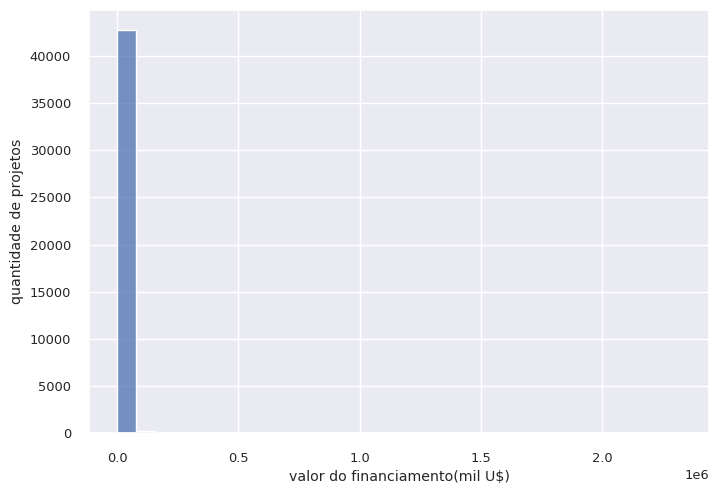

In [ ]:
# histograma variável 'corrected_usd'

sn.histplot(dataset['corrected_usd'], kde=False, bins=30)

# inclui rótulos dos eixos
plt.xlabel('valor do financiamento(mil U$)')
plt.ylabel('quantidade de projetos')

None

O gráfico mostra uma distribuição unimodal e assimétrica à direita, demonstrando vizualmente alguns dos achados da etapa anterior. Por ser uma distribuição de grande amplitude - como já constatado no resumo estatístico - a visualização de boa parte dos dados fica bastante difícil, principalmente para a compreensão da distribuição dos financiamentos acima de 500 milhões de dólares.

Por isso, será feita a transformação do gráfico para a escala logarítimica que, apesar de trazer certa distorção para visualização, permite melhor compreender a distribuição.

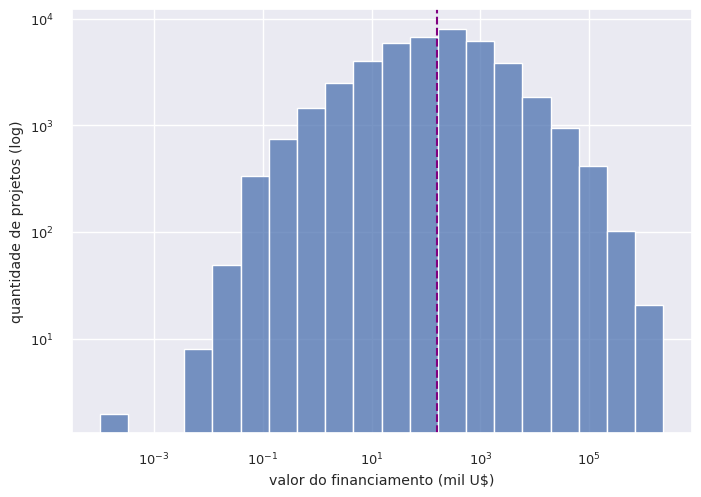

In [ ]:
# histograma em escala logarítimica

sn.histplot(dataset['corrected_usd'], kde=False, bins=20, log_scale = (True,True))

# inclui rótulos dos eixos
plt.xlabel('valor do financiamento (mil U$)')
plt.ylabel('quantidade de projetos (log)')

# indica mediana da distribuição
plt.axvline(x=dataset['corrected_usd'].median(), color='purple', ls='--')

A adoção da escala logarítimica permite compreender que os projetos de financiamento climático se concentram mais em faixas de valores entre 10 mil e 1 milhão de dólares. Além disso, é possível identificar que projetos de menos de 100 dólares são pouco frequentes no dataset, e os valores mínimo e máximo encontrados para a distribuição constituem outliers.

Para o problema colocado, os dados de valor do financiamento serão mantidos tal qual estão, já que se trata de uma análise exploratória das características do financiamento. No entanto, cabe destacar que, na possibilidade para a aplicação de machine learning, seria de grande interesse realizar a normalização ou padronização desses valores, buscando reduzir a amplitude da distribuição. Especialmente na possibilidade elencada de um problema de clusterização para a identificação de perfis de financiadores ou tipos de projeto, seria bastante adequado testar o dataset com essas transformações para um melhor desempenho do algoritmo não supervisionado.

###2) Investimento por ano

O dataset traz dados de relatórios apresentados entre 2015 e 2020, o que traz a possibilidade de uma avaliação quanto a variação desses projetos ao longo desse tempo. Assim serão propostas nessa seção algumas formas de observação sobre as características do financiamento climático nesse período.

####Total de projetos por ano

In [ ]:
# dataframe contabilizando total de projetos por ano

projects_per_year = dataset.groupby(['year'])[['id']].count().reset_index()

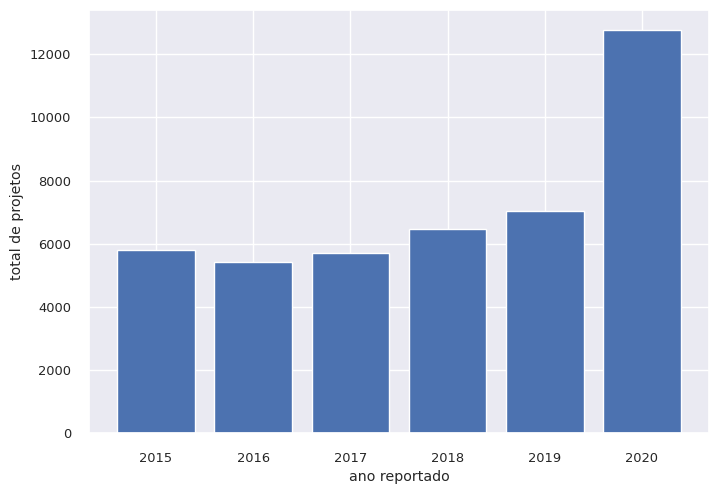

In [ ]:
# cria gráfico de barras projetos x ano

fig, ax = plt.subplots()
ax.bar(x = projects_per_year['year'], height = projects_per_year['id'])

# inclui rótulos dos eixos
plt.xlabel('ano reportado')
plt.ylabel('total de projetos')

plt.show()

Por meio deste gráfico, é possível perceber que a quantidade de projetos reportados demonstrou um crescimento mais tímido entre os anos de 2016 e 2019, tendo aum aumento mais significativo no número de projetos apenas em 2020.

####Total investido por ano

In [ ]:
# dataframe contabilizando total investido por ano

funding_per_year = dataset.groupby(['year'])[['corrected_usd']].sum().reset_index()

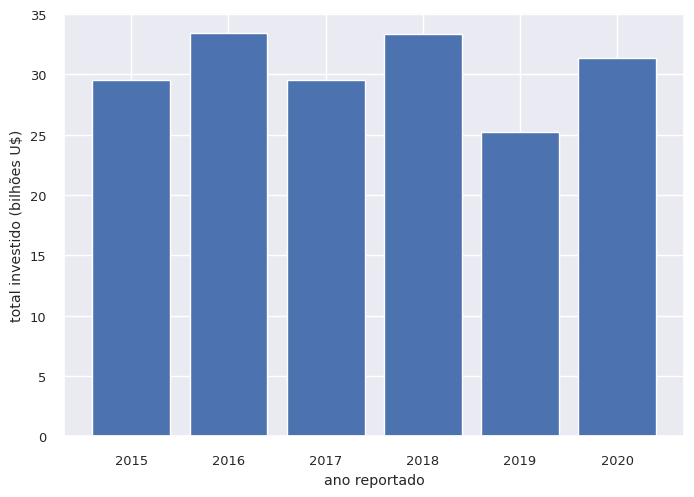

In [ ]:
# cria gráfico de barras valor investido x ano

fig, ax = plt.subplots()
ax.bar(x = funding_per_year['year'], height = funding_per_year['corrected_usd']/1e6)

# inclui rótulos dos eixos
plt.xlabel('ano reportado')
plt.ylabel('total investido (bilhões U$)')

plt.show()

A partir do gráfico, tem-se que o ano de 2016 foi o periodo em que se investiu o maior montante, enquanto 2019 teve o menor valor total investido em financiamento climático, considerando o intervalo entre 2015 e 2020 compreendido no dataset.

Curiosamente, a variação dos valores investidos não acompanha a variação da quantidade de projetos, o que pode levar a inferências como as de que os projetos de financiamento reportados em 2016 possuíam valores mais altos, enquanto os projetodos de 2020 tenderam a valores mais baixos.

Para verificar um pouco melhor essa possibilidade, será feito um boxplot para a comparação das distribuições dos valores de projetos em cada ano compreendido pelo dataset.

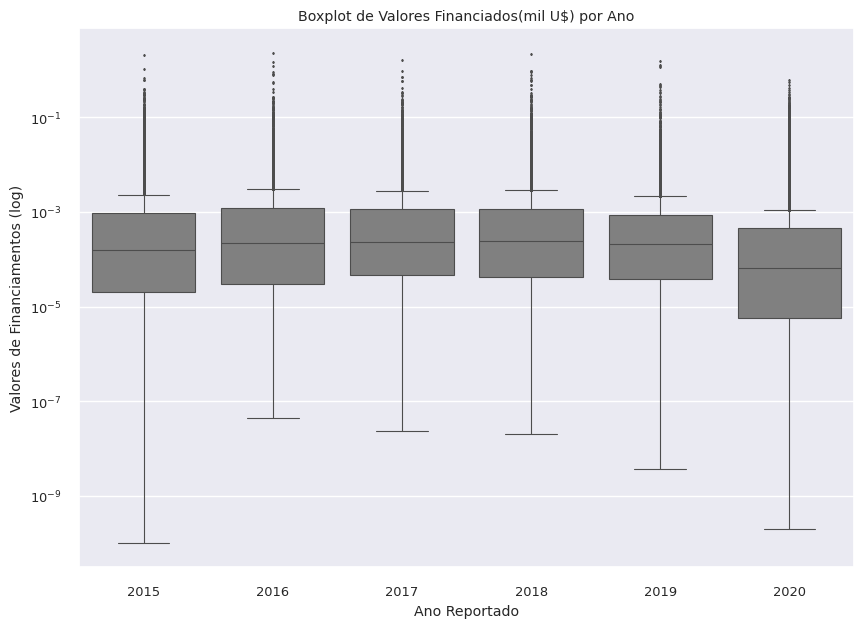

In [ ]:
# cria boxplot da distribuição dos valores dos projetos por ano

plt.figure(figsize=(10,7))

sn.boxplot(
    x = dataset['year'],
    y = dataset['corrected_usd']/1e6,
    linewidth=0.8,
    fliersize=1,
    color='grey'
)

# converte o gráfico para escala logarítimica
plt.yscale('log')

# inclui rótulos dos eixos e título
plt.xlabel('Ano Reportado')
plt.ylabel('Valores de Financiamentos (log)')
plt.title('Boxplot de Valores Financiados(mil U$) por Ano')

None

Apesar da comparação realizada confirmar que os projetos em 2020 tenderam a apresentar valores mais baixos que os demais anos, o ano de 2016 apresentou uma distribuição bem próxima dos demais anos, de maneira que o sua superioridade em termos do valor total investido porde ser provavelmente atribuída a outiliers da sua distribuição, considerando ainda que seu valor mínimo é o maior na comparação entre os anos.

###3) Tipos de projetos financiados

Outra importante abordagem que o problema traz fala sobre a forma da destinação dos financiamentos climáticos, que podem compreender projetos de diferentes naturezas. Nesse sentido, serão observados como se distribuem os projetos conforme indicados no seu atributo *'type_of_support'*.

Para uma primeira aproximação, será necessário compreender quais entradas são admissíveis para esse atributo, visualizando todos os valores únicos existentes nessa coluna.

In [ ]:
# verifica entradas únicas para o tipo de projeto

dataset['type_of_support'].value_counts()

adaptation                                 19967
mitigation                                 12065
cross-cutting                              10685
cross cutting                                138
other (crosscutting)                          74
redd+/biodiversity (cross-cutting)            56
adaptation                                    39
redd+/biodiversity (cross-cutting)            35
mitigation                                    35
redd+/biodiversity (adaptation)               32
redd+/biodiversity (mitigation)               15
redd+/biodiversity (adaptation)                8
redd+/biodiversity (mitigation)                6
as individual concessional loan                4
other (capacity building)                      3
other (reseach)                                2
 redd+/biodiversity (mitigation)               2
 redd+/biodiversity (cross-cutting)            2
other                                          1
other ()                                       1
other (as individual

A partir desse resultado é possível observar que há diferentes categorias de projeto, porém algumas apresentam semelhanças dentre si - como subgrupos de uma mesma categoria - e outras estão repetidas porém, devido a pequenas diferenças na forma de registro, ficaram agrupadas separadamente.

A partir daí, é identificada a necessidade de uma nova etapa de tratamento dos dados, visando, sobretudo, ajustar as categorias duplicadas para um dataset mais limpo. Já no caso dos subgrupos, pensando na possiblidade de aplicação futura para machine learning e com fins de simplificação das análises, será adotada uma nova coluna no dataset com a indicação apenas das categorias principais.

####Pré-processamento



**Remoção de categorias em duplicidade**

A primeira forma de tratamento para evitar as categorias duplicadas no dataset será removendo os possíveis espaços antes e depois dos textos de cada entrada, que podem ser a razão da separação equivocada de uma mesma categoria em grupos distintos.

Como essa mesma questão pode ser comum a outras colunas categóricas do dataset, optou-se por realizar essa operação em todas as variáveis cujo datatype fosse 'object'.      

In [ ]:
# remove espaços antes e depois dos textos

dataset = remove_spaces(dataset)

In [ ]:
# verifica entradas únicas para o tipo de projeto

dataset['type_of_support'].value_counts()

adaptation                                 20006
mitigation                                 12100
cross-cutting                              10685
cross cutting                                138
redd+/biodiversity (cross-cutting)            93
other (crosscutting)                          74
redd+/biodiversity (adaptation)               40
redd+/biodiversity (mitigation)               23
as individual concessional loan                4
other (capacity building)                      3
other (reseach)                                2
other ()                                       1
other                                          1
other (as individual concessional loan)        1
post-secondary education                       1
Name: type_of_support, dtype: int64

Ao verificar novamente as entradas únicas para o atributo relacionado ao tipo de projeto apoiado, já pode ser observada uma redução significativa de categorias em duplicidade. Porém ainda é possível observar alguns dados que ainda necessitam limpeza. Para estes, será utilizada uma abordagem mais "manual" para as transformações.

In [ ]:
# ajuste 'manual' das categorias em duplicidade restantes

dataset = duplicate_adjust(dataset)

In [ ]:
# verifica entradas únicas para o tipo de projeto

dataset['type_of_support'].value_counts()

adaptation                                 20006
mitigation                                 12100
cross-cutting                              10897
redd+/biodiversity (cross-cutting)            93
redd+/biodiversity (adaptation)               40
redd+/biodiversity (mitigation)               23
other (as individual concessional loan)        5
other (capacity building)                      3
other                                          2
other (reseach)                                2
other (post-secondary education)               1
Name: type_of_support, dtype: int64

Após as operações empregadas, é possível perceber que já não há categorias duplicadas para este atributo, facilitando a leitura e análise do dataset.

**Criação de novo atributo**

Apesar de já ser possível uma avaliação sobre os tipos de projetos aos quais os financiamentos estão sendo destinados, será feito um agrupamento dos tipos encontrados em categorias mais abrangentes. Assim, a partir dos "subgrupos" já identificados pelo atributo *type_of_support*, serão consideradas apenas 4 grandes categorias, expressas em uma nova coluna a ser criada:

- adaptation
- mitigation
- cross-cutting
- other

In [ ]:
# cria nova coluna para categorias do tipo projeto

dataset = create_support_att(dataset)

In [ ]:
# verifica entradas na nova coluna criada

dataset['type_of_support_group'].value_counts()

adaptation       20046
mitigation       12123
cross-cutting    10990
other               14
Name: type_of_support_group, dtype: int64

####Análises dos tipos de projetos financiados

**Principal tipo de projeto financiado**

Como primeira observação sobre esse tema, será avaliado para quais tipos de projetos os financiamentos são frequentemente destinados, comparando as categorias identificadas.

In [ ]:
# dataframe contabilizando total de financiamentos por tipo de projeto

project_types = dataset.groupby(['type_of_support_group'])[['id']].count().reset_index()

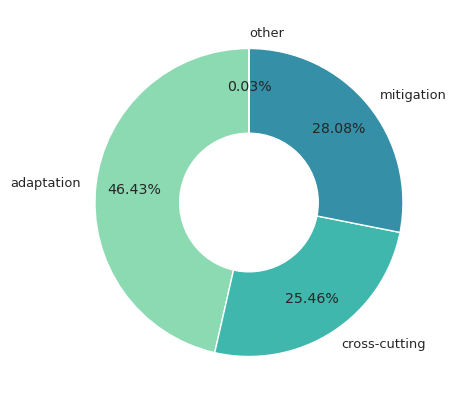

In [ ]:
# cria gráfico de pizza (donut chart)

plt.figure(figsize=(5,5))

plt.pie(
    x=project_types['id'],
    labels=project_types['type_of_support_group'],
    autopct='%1.2f%%',
    colors=sn.color_palette('mako_r'),
    startangle=90,
    pctdistance=0.75
)

# desenha o circulo central
hole = plt.Circle((0, 0), 0.45, facecolor='white')
plt.gcf().gca().add_artist(hole)

None

O gráfico revela que a maior parte dos financiamentos relacionados no dataset são destinados a projetos relacionados à adaptação frente às mudanças climáticas. Apesar disso, projetos para a mitigação de danos e projetos em caráter transversal representam ainda parcelas muito expressivas da destinação de financiamentos climáticos.

**Montante destinado por tipo de projeto**

Ainda que os projetos de adaptação sejam maioria no dataset, cabe também avaliar quanto aos valores empregados por cada tipo de projeto, uma vez que, a depender da natureza da ação o financiamento necessário pode ser maior ou menor.

In [ ]:
# dataframe contabilizando valor financiado por tipo de projeto

project_type_sorted = dataset.groupby(['type_of_support_group'])[['corrected_usd']].sum().reset_index().sort_values(['corrected_usd'], ascending = False)

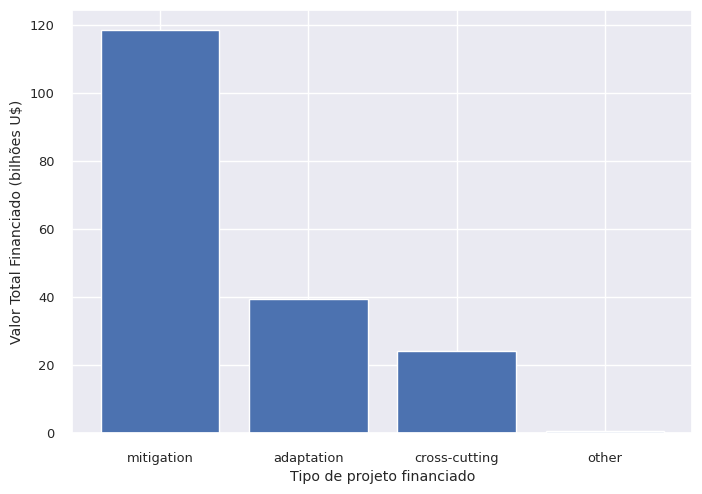

In [ ]:
# gráfico de barras valor financiado x tipo de projeto

fig, ax = plt.subplots()
ax.bar(x = project_type_sorted['type_of_support_group'], height=project_type_sorted['corrected_usd']/1e6)

# inclui rótulos dos eixos
plt.xlabel('Tipo de projeto financiado')
plt.ylabel('Valor Total Financiado (bilhões U$)')

plt.show()

O gráfico acima revela um dado curioso: apesar da maior parte dos projetos estar relacionada à ações para adaptação, na comparação dos valores investidos é percebido um montante muito maior destinado a ações de mitigação, chegando a mais que o dobro investido em adaptação.

Para verificar se essa relação é uma constante - em que projetos de adaptação tendem a ter financiamentos de valores mais baixos que os de mitigação - ou se há algum projeto específico (outlier) implicando na diferença observada, será feito um boxplot com as distribuições dos valores de financiamento conforme os tipos de projeto

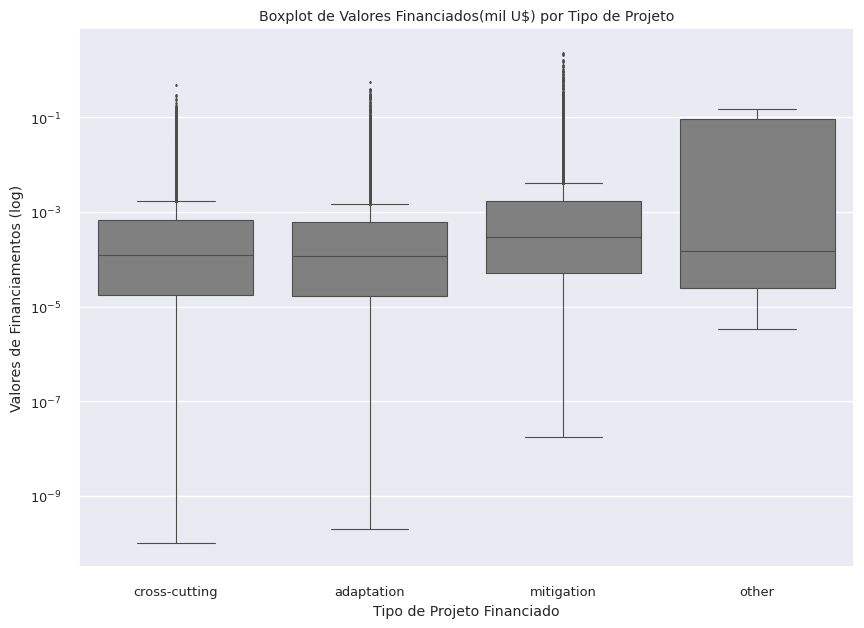

In [ ]:
# cria boxplot da distribuição dos valores dos financiamentos por tipo de projeto

plt.figure(figsize=(10,7))

sn.boxplot(
    x = dataset['type_of_support_group'],
    y = dataset['corrected_usd']/1e6,
    linewidth=0.8,
    fliersize=1,
    color='grey'
)

# converte o gráfico para escala logarítimica
plt.yscale('log')

# inclui rótulos dos eixos e título
plt.xlabel('Tipo de Projeto Financiado')
plt.ylabel('Valores de Financiamentos (log)')
plt.title('Boxplot de Valores Financiados(mil U$) por Tipo de Projeto')

None

O boxplot confirma a hipótese levantada sobre os projetos de mitigação, que de fato recebem, em geral, financiamentos em valores mais altos.

###4) Status dos financiamentos

Uma suspeita levantada no problema em questão, está relacionada à possibilidade de que os financiamentos, apesar de comprometidos no orçamento dos países desenvolvidos, não chegam ao destino pretendido. Para isso, será feita uma análise das condições de status dos financiamentos para a confirmação ou não possibilidade

Primeiramente, como já feito na avaliação com outras variáveis, serão observados os valores admitidos no atributo *status* no dataset.

In [ ]:
# verifica entradas únicas para o status do financiamento

dataset['status'].value_counts()

Disbursed               20521
Committed               17207
committed                3635
disbursed                1448
Provided                  311
Committed, Disbursed       38
provided                   11
Name: status, dtype: int64

Mais uma vez, constata-se que há tipos de entrada que possuem o mesmo status mas que estão sendo considerados como diferentes, necessitando assim mais uma etapa de tratamento.

####Pré-processamento

**Conversão em minúsculas (lower case)**

Dessa vez, o método de tratamento para eliminar categorias em duplicidade será a conversão de todas as letras para minúsculas, evitando diferenciações devido à escrita com letras maiúsculas.

Assim como na remoção de espaços, esse procedimento é também aplicado a todas as colunas do tipo *object* do dataset.

In [ ]:
 # textos convertidos para somente minúsculas

 dataset = lower_case(dataset)

In [ ]:
# verifica entradas únicas para o status do financiamento

dataset['status'].value_counts()

disbursed               21969
committed               20842
provided                  322
committed, disbursed       38
Name: status, dtype: int64

**Ajuste fino de categoria em duplicidade**

Considerando que o status *'committed, disbursed'* é equivalente em termos práticos ao status *'disbursed'*, será também feito o ajuste para que eles se enquadrem na mesma categoria.

In [ ]:
# conversão para unir categoria 'disbursed'

dataset['status'] = dataset['status'].apply(lambda status: 'disbursed' if status == 'committed, disbursed' else status)

In [ ]:
# verifica entradas únicas para o status do financiamento

dataset['status'].value_counts()

disbursed    22007
committed    20842
provided       322
Name: status, dtype: int64

Após a realização das novas etapas de tratamento, verifica-se que as categorias restantes para designar o status dos projetos estão ajustadas sem que haja duplicidade entre os grupos possíveis.

####Análise dos status dos financiamentos

Para compreender melhor sobre os status mais frequentemente encontrados nos projetos do dataset, é apresentado um gráfico de pissa, revelando a participação de cada status em relação ao total de financiamentos listados.

In [ ]:
# dataframe contabilizando total de financiamentos por status

project_status = dataset.groupby(['status'])[['id']].count().reset_index()

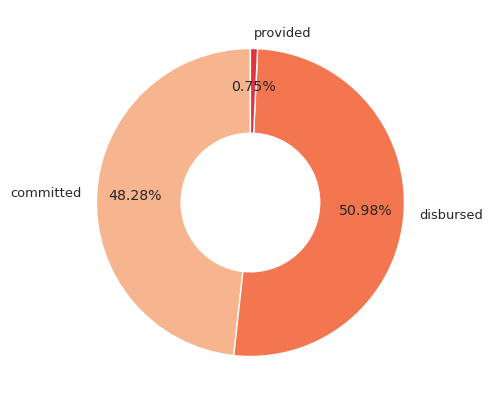

In [ ]:
# cria gráfico de pizza (donut chart)

plt.figure(figsize=(5,5))

plt.pie(
    x=project_status['id'],
    labels=project_status['status'],
    autopct='%1.2f%%',
    colors=sn.color_palette('rocket_r'),
    startangle=90,
    pctdistance=0.75
)

# desenha o circulo central
hole = plt.Circle((0, 0), 0.45, facecolor='white')
plt.gcf().gca().add_artist(hole)

None

Embora fundos desembolsados sejam maioria no dataset, a quantidade de fundos que foram apenas empenhados - ou seja, que possivelmente ainda não chegaram ao destino e ainda podem sofrer alterações - é bastante significativa nesse contexto. Assim, apesar de não serem maioria absoluta, os dados dão força à hipótese levantada.

No entanto, cabe um importante esclarecimento quanto a análise dessa variável. Assumiu-se na análise o entendimento convencional dos status identificados, conforme as seguintes definições:

- **commited (empenhado)**: valor comprometido no orçamento porém ainda passível de alterações ou contingenciamento.

- **provided (provido)**: valor já destinado e garantido ao financiamento mas com possibilidade de ainda não ter sido ainda depositado na conta de destino.

- **disbursed (desembolsado)**: valor já desembolsado e ao alcance do destinatário.

Apesar disso, os países podem utilizar terminologias e metodologias próprias para reportar os projetos de financiamento, o que dificulta a leitura imediata do resultado obtido. Como exemplo dessa questão, é possível que alguns países relatem como *provided* projetos já desembolsados, uma vez que a definição convencional não é totalment clara em relação a essa possibilidade.

###5) Diferenças entre países financiadores

O problema envolve entre suas questões o entendimento sobre quais países desenvolvidos estão investindo mais em projetos de natureza climática nos países em desenvolvimento.

####Total de projetos financiados por país financiador

In [ ]:
# dataframe contabilizando total de projetos por país financiador

project_per_country = dataset.groupby(['reporting_party'])[['id']]\
                                      .count()\
                                      .sort_values(['id'])\
                                      .reset_index()

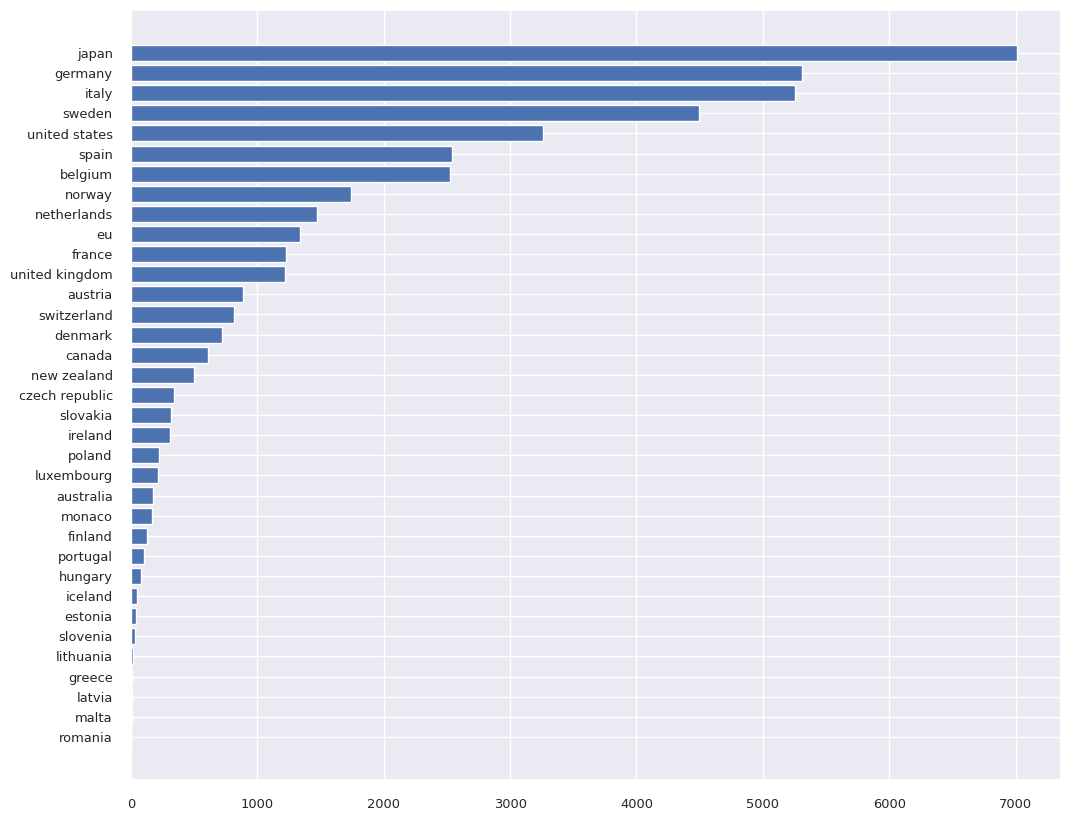

In [ ]:
# gráfico de barras projetos financiados x país financiador

fig, ax = plt.subplots(figsize = (12,10))
ax.barh(y = project_per_country['reporting_party'], width= project_per_country['id'])
plt.show()

Percebe-se que Japão e Alemanha são os países com maior quantidade de projetos de financiamento, de acordo com o dataset observado. Destaca-se aqui também a Italia com um volume expressivo de projetos, o que é uma curiosidade pouco esperada dentro desse tema.

####Valor total financiado por país financiador

In [ ]:
# dataframe contabilizando valor financiado por país financiador

funding_sorted = dataset.groupby(['reporting_party'])[['corrected_usd']].sum()\
                                            .sort_values(['corrected_usd'])\
                                            .reset_index()


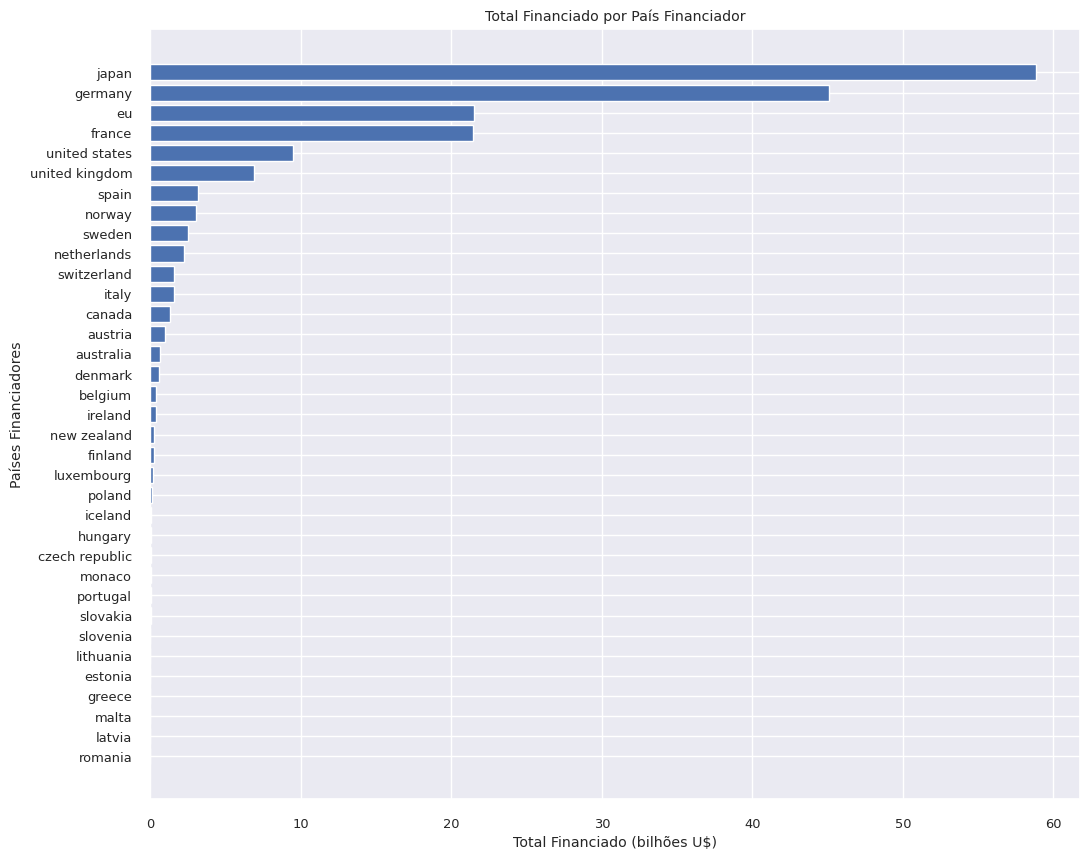

In [ ]:
# gráfico de barras projetos financiados x país financiador

fig, ax = plt.subplots(figsize = (12,10))
ax.barh(y = funding_sorted['reporting_party'], width = funding_sorted['corrected_usd']/1e6)

# inclui rótulos dos eixos e título
plt.xlabel('Total Financiado (bilhões U$)')
plt.ylabel('Países Financiadores')
plt.title('Total Financiado por País Financiador')

plt.show()

Por meio do gráfico obtido, compreende-se que o Japão é também o país desenvolvido que dispensou a maior soma em financiamento climático entre 2015 e 2020, com um valor bastante superior ao segundo principal investidor, a Alemanha.

Apesar do resultado encontrado, a utilização de um boxplot ajuda a compreender melhor o perfil dos montantes investidos por cada país, como por exemplo se concentram poucos projetos de valores mais altos ou se investem em projetos de valores mais ou menos semelhantes.

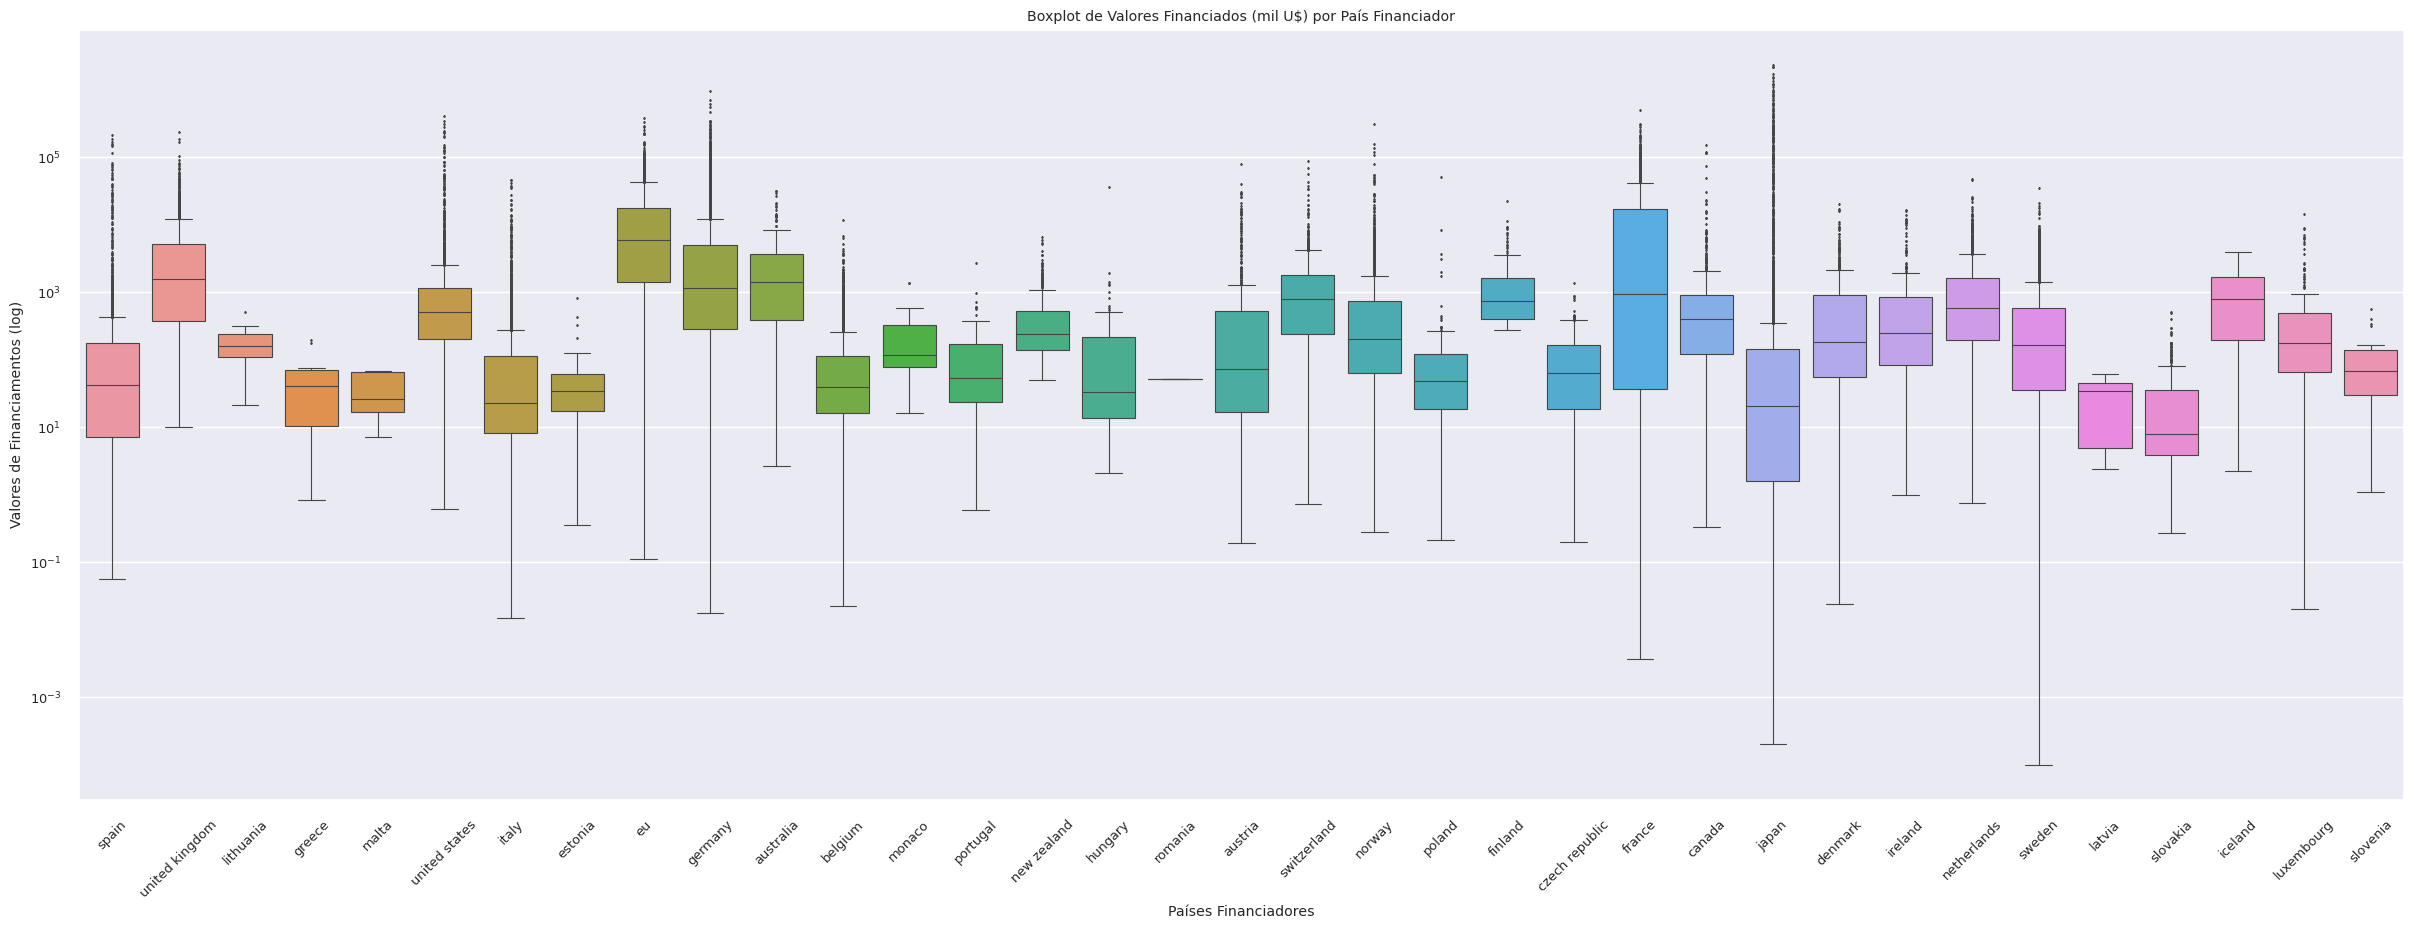

In [ ]:
# boxplot dos valores financiados nos projetos por países financiadores

plt.figure(figsize=(30,10))

chart = sn.boxplot(
    x = dataset['reporting_party'],
    y = dataset['corrected_usd'],
    linewidth=0.8,
    fliersize=1,
)

# aplica escala logarítimica
plt.yscale('log')

# inclui rótulos dos eixos e título
plt.xlabel('Países Financiadores')
plt.ylabel('Valores de Financiamentos (log)')
plt.title('Boxplot de Valores Financiados (mil U$) por País Financiador')

chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

None

Vemos pelo gráfico que o Japão é também o país com maior variação em termos de valores dos projetos, com financiamentos de baixo valor e outros de mais de 1 bilhão de dólares. Já a Alemanha, segundo principal investidor, faz investimentos em projetos com valores mais altos de financiamento.

Observa-se ainda que, a União Européia é quem concentra mais projetos entre de valores mais altos, com mediana acima de 1 milhão de dólares.

###6) Destinos dos financiamentos

Entre as questões levantadas pelo problema está ainda a destinação dos financiamentos entre as regiões e países em desenvolvimento, o que poderia indicar uma superconcentração de recursos para uma determinada região ou uma distribuição mais homogênea.

####Total de projetos por região de destino

Como primeira aproximação, veremos como os projetos estão distribuídos entre as regiões elencadas nos atributos do dataset, utilizando as colunas do tipo boleanas para essa avaliação (ainda que já convertidas em valores numéricos de 0 e 1)

In [ ]:
# dataframe contabilizando quantidade de projetos por região destinatária

funding_regions = (dataset.groupby([
            'africa',
            'latin_america_the_caribbean',
            'north_america',
            'middle_east',
            'mediterranean',
            'asia',
            'europe',
            'oceania',
            'global',
            'multicontinent_or_global',
            'continent_unspecified'
])[['id']].count()).reset_index()

In [ ]:
funding_regions

,africa,latin_america_the_caribbean,north_america,middle_east,mediterranean,asia,europe,oceania,global,multicontinent_or_global,continent_unspecified,id
0,0,0,0,0,0,0,0,0,0,0,1,2350
1,0,0,0,0,0,0,0,0,1,1,0,3203
2,0,0,0,0,0,0,0,1,0,0,0,959
3,0,0,0,0,0,0,1,0,0,0,0,1846
4,0,0,0,0,0,1,0,0,0,0,0,10416
5,0,0,0,0,0,1,0,1,0,1,0,151
6,0,0,0,0,0,1,1,0,0,1,0,85
7,0,0,0,0,0,1,1,1,0,1,0,1
8,0,0,0,0,1,0,0,0,0,0,1,40
9,0,0,0,1,0,0,0,0,0,0,1,100


Por meio do dataframe construído, percebe-se que os projetos de financiamento não estão necessariamente designados para uma única região ou continente. Ainda assim, seguiremos a análise para entender como as regiões indicadas nos atibutos do dataset se relacionam aos projetos de financiamento.

In [ ]:
# dataframe somente com a quantidade de projetos por região destinatária

funding_destinations = pd.DataFrame(columns=['região', 'total_projetos'])

# seleciona colunas das regiões para o processamento
destinations=[
    'africa',
    'latin_america_the_caribbean',
    'north_america',
    'middle_east',
    'mediterranean',
    'asia',
    'europe',
    'oceania',
    'global',
    'multicontinent_or_global',
    'continent_unspecified'
]

# computa a quantidade de projetos por região (colunas selecionadas)
for dest in destinations:
  funding_destinations = funding_destinations.append({
      'região': dest,
      'total_projetos': dataset[dest].sum()
    },
    ignore_index=True
  )

# ordena o dataset pela quantidade de projetos
funding_destinations = funding_destinations.sort_values('total_projetos')

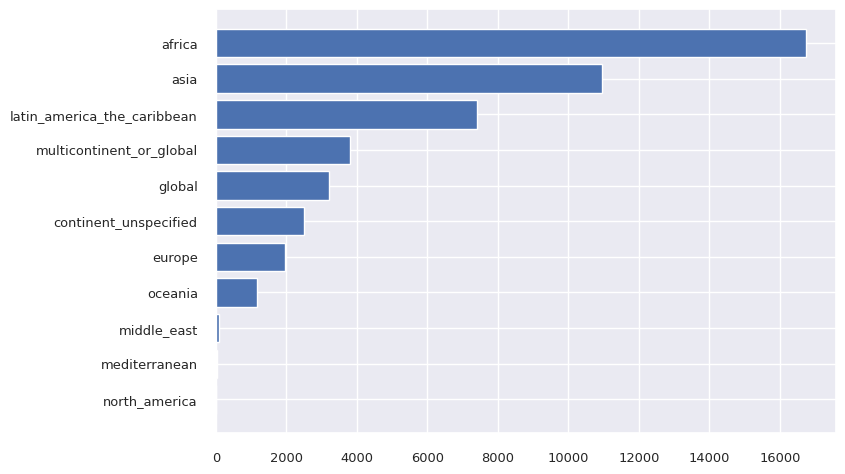

In [ ]:
# cria gráfico de barras com a quantidade de projetos x região destinatária

fig, ax = plt.subplots()
ax.barh(y = funding_destinations['região'], width = funding_destinations['total_projetos'])

plt.show()

No gráfico, é possível ver que a principal região de destino de financiamentos climáticos de acordo com os dados deste dataset é a África, seguida da Ásia e da América Latina e Caribe, em se tratando de quantidade de projetos/iniciativas.

####Montante financiado por região destinatária

In [ ]:
# dataframe com valor total financiado por região destinatária

destinations_values = pd.DataFrame(columns=['região', 'valor_total(U$ milhões)'])

# computa valor total dos projetos por região (colunas selecionadas)
for dest in destinations:
    valid_projects = dataset.loc[dataset[dest] == 1]
    destinations_values = destinations_values.append({
      'região': dest,
      'valor_total(U$ milhões)': valid_projects['corrected_usd'].sum()/1000
    },
    ignore_index=True
  )

# ordena o dataset pelo valor total recebido
destinations_values = destinations_values.sort_values('valor_total(U$ milhões)')

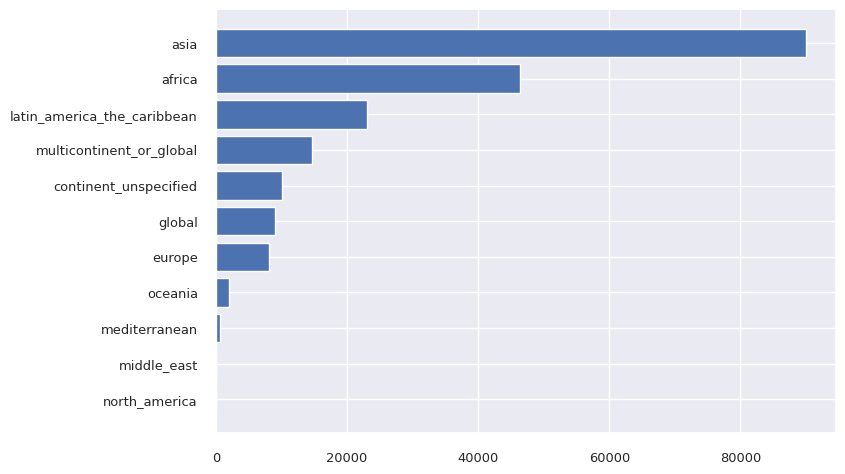

In [ ]:
# cria gráfico de barras com valor financiado x região destinatária

fig, ax = plt.subplots()
ax.barh(y = destinations_values['região'], width = destinations_values['valor_total(U$ milhões)'])

plt.show()


A partir do gráfico, nota-se que em termos de valores, o continente Asiático foi o que recebeu o maior montante no período compreendido pelo dataset, ainda que o continente africano supere em quantidade de projetos de financiamento recebidos.

###7) Outros cruzamentos

####Status dos financiamentos por país financiador


Na análise sobre o status dos projetos, levantou-se a possibilidade de determinados termos serem utilizados especificamente por algum país. Para investigar melhor a questão, será feito um gráfico de barras empilhadas em 100%, conforme o status dos financiamentos para cada país desenvolvido incluído no dataset como financiador.

In [ ]:
# dataframe contabilizando status dos projetos por país financiador

status_country = (pd.crosstab(
    dataset['reporting_party'],
    [dataset['status']],
    rownames=['reporting_party'],
    colnames=['status']
)).sort_values(['disbursed'])

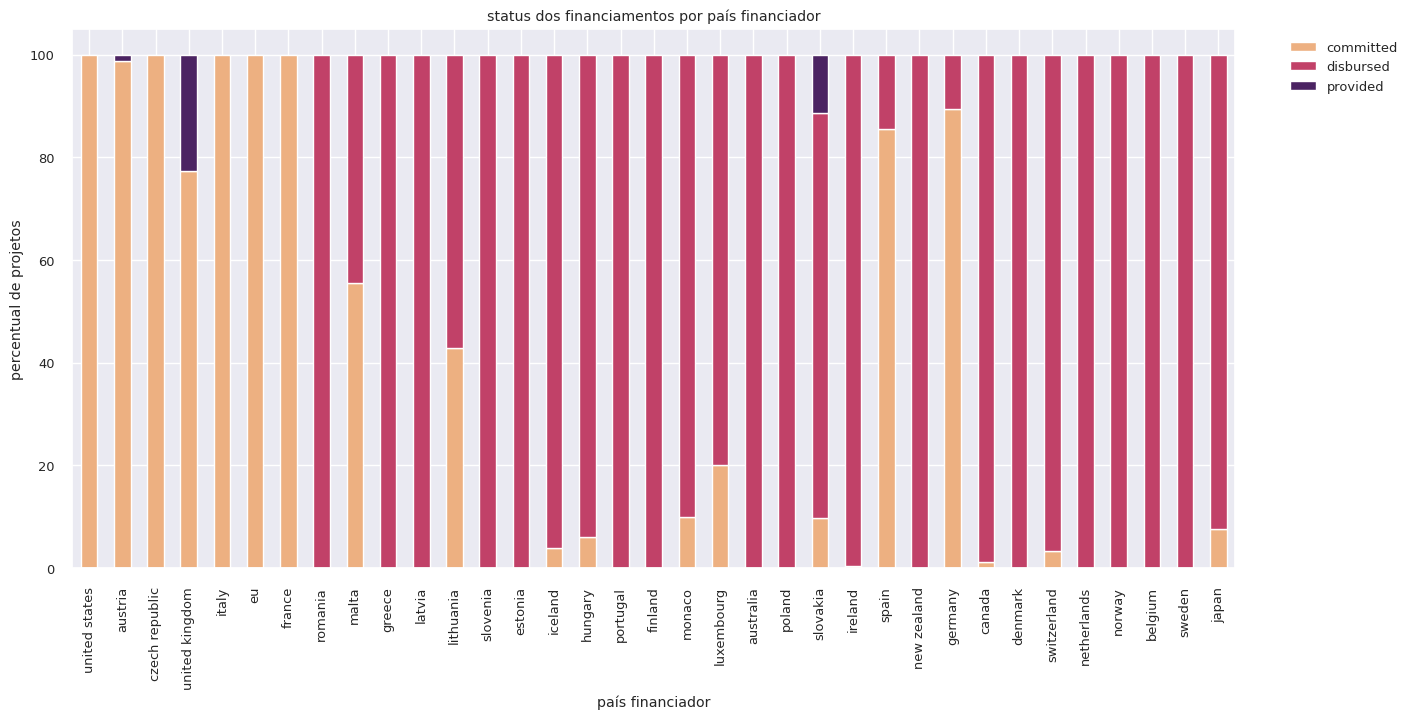

In [ ]:
# gráfico de barras empilhadas

## cria coluna com total para cada país
status_country['Total'] = status_country.sum(axis=1)

## converte valores em percentual
status_country_percent = status_country.div(status_country['Total'], axis=0)*100

## remove coluna do total
status_country_percent.drop(columns=['Total'], inplace=True)


## cria gráfico de barras empilhadas
ay = status_country_percent.plot(kind='bar', stacked=True, colormap='flare', figsize=(15,7))

## inclui rótulos dos eixos e título
plt.xlabel('país financiador')
plt.ylabel('percentual de projetos')
plt.title('status dos financiamentos por país financiador')

plt.legend(bbox_to_anchor=(1.15, 1), loc='upper right')

plt.show()

No gráfico, tem-se que alguns países como Estados Unidos, Italia e França somente reportaram projetos de financiamento na condição de "comitted", o que pode ser uma questão relacionada à terminologia utilizada, ou mesmo à forma e momento de elaboração do relatório às Nações Unidas.

Por outro lado, o Japão, como principal financiador, tem a maioria de seus projetos indicados como "disbursed", não restando dúvidas de que o repasse dos valores chegou ao destino final.

####Tipo de projeto por região destinatária

Ao avaliar os tipos de projeto a que se destinam o financiamento, surge a ainda a questão quanto ao destino de cada um, uma vez que cada região pode apresentar necessidades distintas. Dessa forma, propõe-se um gráfico de barras empilhadas em 100% para avaliar os tipos de ações que estão sendo financiadas em cada região destinatária contida no dataset.

In [ ]:
# dataframe somente com a quantidade de projetos por região destinatária

type_per_destination = pd.DataFrame(columns=[
    'região',
    'mitigação',
    'adaptação',
    'transversal',
    'outros',
    'total'
])

# computa os tipos de projetos por região
for dest in destinations:
  valid_projects = dataset.loc[dataset[dest] == 1]

  mitigation = valid_projects[valid_projects['type_of_support_group'] == 'mitigation']
  adaptation = valid_projects[valid_projects['type_of_support_group'] == 'adaptation']
  cross_cutting = valid_projects[valid_projects['type_of_support_group'] == 'cross-cutting']
  other = valid_projects[valid_projects['type_of_support_group'] == 'other']

  type_per_destination = type_per_destination.append({
      'região': dest,
      'mitigação': len(mitigation),
      'adaptação': len(adaptation),
      'transversal': len(cross_cutting),
      'outros': len(other),
      'total': len(valid_projects)
    },
    ignore_index=True
  )

# configura a coluna com nomes como index
type_per_destination = type_per_destination.set_index('região')

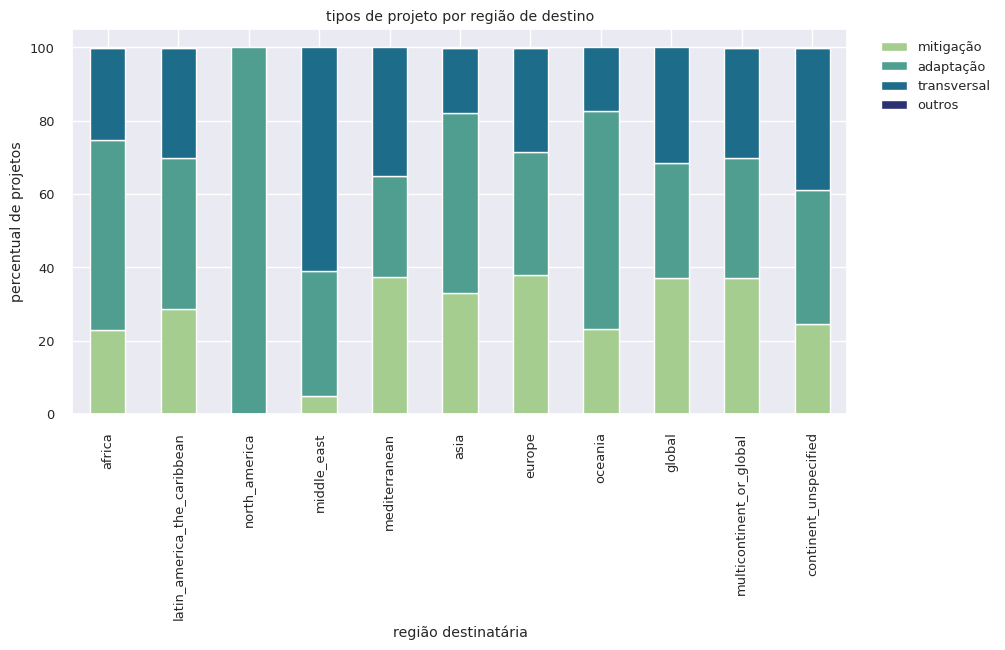

In [ ]:
# gráfico de barras empilhadas

## converte valores em percentual
type_destination_percent = type_per_destination.div(type_per_destination['total'], axis=0)*100

## remove coluna do total
type_destination_percent.drop(columns=['total'], inplace=True)


## cria gráfico de barras empilhadas
ay = type_destination_percent.plot(kind='bar', stacked=True, colormap='crest', figsize=(10,5))

## inclui rótulos dos eixos e título
plt.xlabel('região destinatária')
plt.ylabel('percentual de projetos')
plt.title('tipos de projeto por região de destino')

plt.legend(bbox_to_anchor=(1.20, 1), loc='upper right')

plt.show()

O gráfico revela que tanto África (que recebe a maioria dos projetos) quanto Ásia (que recebe o maior valor em financimentos) são destinatários principalmente de projetos de adaptação. No entanto, a Ásia apresenta um maior percentual de projetos de mitigação, enquanto África possui maior percentual de projetos em caráter transversal. Já olhando para a América Latina e Caribe, vê-se que a participação dos três principais tipos de projetos é quase a mesma.

####Tipo de projeto por ano

Complementando as análises já realizadas, será também abordado como variou o fiananciamento para cada tipo de projeto ao longo do tempo. Nesse sentido, é apresentado um gráfico de linhas evidenciando essa variação entre os anos contemplados pelo dataset.

In [ ]:
# dataframe contabilizando tipos de projeto por ano

project_year = (pd.crosstab(
    dataset['year'],
    [dataset['type_of_support_group']],
    rownames=['year'],
    colnames=['type_of_support_group']
)).reset_index()

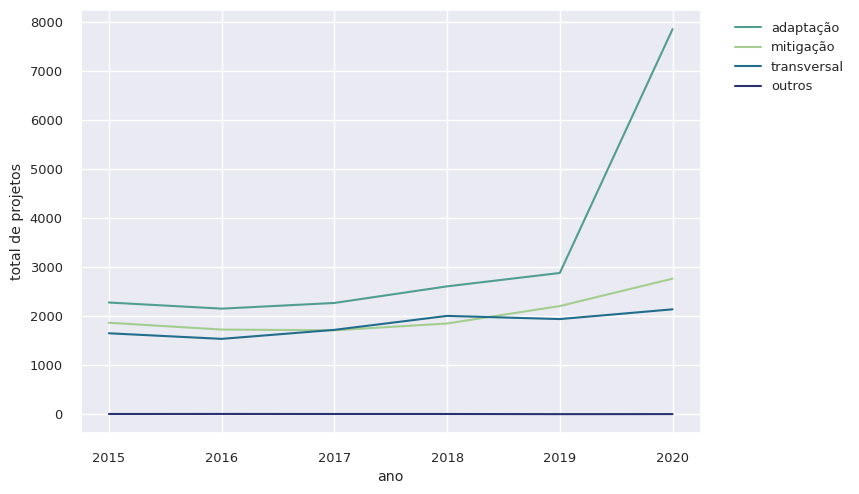

In [ ]:
# cria gráfico de linhas

plt.plot(project_year['year'], project_year['adaptation'], color='#509e90', label='adaptação')
plt.plot(project_year['year'], project_year['mitigation'], color='#a4cd90', label='mitigação')
plt.plot(project_year['year'], project_year['cross-cutting'], color='#216d8b', label='transversal')
plt.plot(project_year['year'], project_year['other'], color='#2b3272', label='outros')

## inclui rótulos dos eixos
plt.xlabel('ano')
plt.ylabel('total de projetos')

## inclui legenda
plt.legend(bbox_to_anchor=(1.25, 1), loc='upper right')

plt.show()

O gráfico demonstra que houve pouca variação na quantidade de projetos em caráter transversal ou financiamentos para mitigação ao longo dos anos. No entanto, é possível perceber que o aumento na quantidade de projetos observada para o ano de 2020 pode ser atribuído ao crescimento no número de projetos voltados para a adaptação frente as mudanças climáticas.

## Conclusões

###1) Respostas ao problema

Através da exploração do dataset foi possível compreender algumas características relevantes dos financiamentos climáticos. Foi possível constatar que dos mais de 180 bilhões investidos, a maior parte vem sendo destinada a projetos para mitigação frente à crise climática, ainda que os projetos de adaptação - por sua vez, mais baratos - sejam em maior quantidade.

Ao longo dos 5 anos compreendidos no dataset, houve pouca variação em termos de valores totais reportados de financiamento, havendo apenas uma leve queda em 2019. Porém, é possível afirmar que houve uma mudança no perfil dos projetos no ano de 2020, em que houve um aumento significativo na quantidade sem que o montante investido aumentasse na mesma proporção, ou seja, os projetos provavelmente se tornaram individualmente mais baratos.

Foi possível revelar ainda que o Japão constitui o principal país desenvolvido financiador, tanto por apoiar a maior quantidade de projetos quanto por investir as maiores quantias no tema. Destaca-se ainda, que os projetos reportados pelo Japão constam, na sua maioria, como já desembolsados e não apenas empenhados - o que é o caso de outros importantes financiadores como a Alemanha, colocando em dúvida se as ajudas financeiras chegam de fato aos países em desenvolvimento na totalidade anunciada.

Já pela ótica da destinação dos valores, o continente asiático foi o que recebeu o maior montante no período abordado pelo dataset, embora a África tenha recebido a maior quantidade de projetos. A América Latina e Caribe também se destaca como uma região de destinação importante dos financiamentos climáticos, embora não seja a principal.

Dessa forma, as análises atenderam ao problema inicialmente proposto de uma melhor compreensão de como tem ocorrido o financiamento climático, mesmo que possam ser feitas ainda outras explorações para o aprofundamento de questões específicas sobre o tema.

###2) Quanto ao dataset e às técnicas aplicadas

O dataset escolhido possui uma boa quantidade de instâncias e de atributos, permitindo análises interessantes para o problema. No entanto, foi fundamental realizar etapas de pré-processamento e limpeza para garantir maior qualidade dos dados trabalhados e resultados obtidos.

Sendo um dataset composto principalmente de variáveis categóricas, foi feita a opção de abordar o problema utilizando principalmente gráficos de barra simples, barras empilhadas ou pizza. No entanto, para algumas observações envolvendo a variável numérica dos valores dos projetos de financiamento, a utilização de gráficos do tipo boxplot permitiu também a realização de comparações interessantes à análise.

No caso dos valores do financiamento, constatou-se uma distribuição com variação de grande amplitude, o que tornou em muitos casos necessária a transformação das escalas dos gráficos para a logarítimica, a fim de tornar possível uma melhor observação das distribuições. Embora essa transformação apenas na visualização dos dados tenha sido suficiente para as análises propostas, caso se tratasse de um problema para aprendizado de máquina, o uso de procedimentos como a normalização ou padronização poderiam ser fundamentais para o bom desempenho do modelo.

De forma geral, o desenvolvimento desse projeto envolveu diferentes etapas de análise e pré-processamento. Dessa forma, a cada análise se detectava o pré-processamento necessário, realizando-o e avançando em outras análises desejadas.

###3) Possíveis melhoramentos e aprofundamentos

Apesar das explorações realizadas terem atendido ao problema inicial, o dataset possui ainda outros atributos não analisados neste estudo. Isso significa que outras características dos financiamentos climáticos podem ser ainda exploradas, a exemplo dos tipos de fontes dos financiamentos, dos setores econômicos ligados à sua destinação ou dos instrumentos utilizados.

O fato de não ter explorado esses outros atributos faz com que também não possa ser garantida a qualidade do dataset como um todo, uma vez que podem ainda haver necessidades de limpeza ou pré-processamentos relacionados a essas variáveis.

Podem ainda ser explorados outros cruzamentos entre as variáveis que enriqueceriam também as análises, tais como avaliar os tipos de projeto por país financiador ou as principais regiões destinatárias por ano, entre outras possíveis.

Destaca-se ainda que no caso da utilização do dataset em um futuro problema de aprendizado de máquina, seria necessária a conversão das variáveis categóricas em variáveis numéricas, realizando o procedimento de one-hot-encoding. Além disso, conforme já indicado anteriormente, seria importante a normalização ou padronização das distribuição dos valores de financiamento, especialmente para trabalhar com modelos que envolvem a posição/proximidade dos dados, como é o caso da clusterização.